In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from datetime import datetime
from dateutil.parser import parse

# Load the file and drop the empty columns 

In [0]:

##Load the data "严重缺陷“  main sheet  skip the fist rows 
## and 

#df_main=pd.read_excel("/content/sample_data/严重缺陷汇总updated 2019-03-26.xlsx",skiprows=1,sheet_name='main')
#df_main=pd.read_excel("/content/sample_data/严重缺陷汇总updated 2019-03-26.xlsx",sheet_name='main')
df_main=pd.read_excel("/content/严重缺陷汇总updated 2019-03-26.xlsx",sheet_name='main')

## drop the empty columns "Unamed 21--50

df_main=df_main.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25',
                      'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31',
                      'Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37',
                      'Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43',
                      'Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47',
                      'Unnamed: 48','Unnamed: 49','Unnamed: 50'
                      ],axis=1)

##replace the 3104X to 3104 and fill the new_alloy wtih Nan for other 
##replace the slippage scratch -120 to "1 "and fillna with "0"

In [0]:
#replace the slippage scratch -120 to "1 "and fillna with "0"
df_main["slippage_scratch"].fillna(0,inplace=True)
df_main["slippage_scratch"].replace(-120,1,inplace=True)
df_main["pickup"].fillna(0,inplace=True)
df_main["pickup"].replace(66,1,inplace=True)




#replace the 3104X to 3104 and fill the new_alloy wtih Nan for other 
alloy_3014x_to3014={"3104":"3104",
                  "3104Y":"3104",
                  "3104F":"3104",
                  "3104L":"3104",
                  "3104H":"3104",
                  "3104J":"3104",
                 }
df_main["new_alloy"]=df_main["LM_Sel_Alloy"].map(alloy_3014x_to3014)


#index with "sample date"
df_main.index=df_main["SAMPLE_DATE"]

#avoid the combtion the index with [sample_date]
df_main['SAMPLE_DATE_origin']=df_main['SAMPLE_DATE']
df_main=df_main.drop(['SAMPLE_DATE'],1)

df_3104=df_main[df_main["new_alloy"]=="3104"]

#merge with other sheet infomation
#df_ssc=pd.merge(df_3104,df_main,left_on="COIL_NO",right_on="LM_Prod_Lot_Num")


# explore the unique list for different columns !

In [262]:
new_alloy_list=pd.unique(df_3104["new_alloy"])
new_alloy_list
alloy_list=pd.unique(df_3104['LM_Sel_Alloy'])
alloy_list
exit_gauge_list = pd.unique(df_3104["LMD_LI_afSchdExtThk"])
exit_gauge_list.sort()
width_list=pd.unique(df_3104["LM_Sel_Ent_Wid"])
width_list.sort()
width_list

array([1230, 1235, 1250, 1430, 1600, 1650, 1698, 1700, 1840, 1926, 1940])

In [0]:
##get top N 
# ExtThk_count=df_3104["LMD_LI_afSchdExtThk"].value_counts()
# ExtThk_count_indexed=ExtThk_count.values.argsort()
# ExtThk_count_top10=ExtThk_count.take(ExtThk_count_indexed[-10:])
# ExtThk_count_top10

#define a function 
"""get top N for given df and column """
def get_top_N (input=df_3104["LM_Sel_Ent_Wid"],N=10):
  column_count=input.value_counts()
  column_count_index=column_count.values.argsort()
  column_count_topN=column_count.take(column_count_index[-N:])
  return column_count_topN

## call the funciotn 
get_top_N(df_3104["LM_Sel_Ent_Wid"],5)


## *#*by groupby**

In [0]:
by_date_pickup=df_3104.groupby(["SAMPLE_DATE_origin","pickup"])
pickup_counts = by_date_pickup.size().unstack().fillna(np.nan)
pickup_by_M=pickup_counts.resample("Q",kind="period")
pickup_counts.columns=["good_coil","pickup_coil"]
pickup_by_M.sum()

# get top N   #by groupby

In [0]:
ExtThk_count=df_3104["LMD_LI_afSchdExtThk"].value_counts()
ExtThk_count_indexed=ExtThk_count.values.argsort()
ExtThk_count_top10=ExtThk_count.take(ExtThk_count_indexed[-10:])
ExtThk_count_top10

get_top_N(df_3104["defect sum"],10)

In [0]:
by_date_ssc=df_3104.groupby(["SAMPLE_DATE_origin","slippage_scratch"])
ssc_counts=by_date_ssc.size().unstack().fillna(np.nan)
ssc_counts.columns=["good coil","slippage_scratch"]
ssc_counts.head(6)

ExtThk_count=df_3104["LMD_LI_afSchdExtThk"].value_counts()
ExtThk_count_indexed=ExtThk_count.values.argsort()
ExtThk_count_top10=ExtThk_count.take(ExtThk_count_indexed[-10:])
ExtThk_count_top10

In [276]:
by_date_pickup=df_3104.groupby(["SAMPLE_DATE_origin","pickup"])
pickup_counts = by_date_pickup.size().unstack().fillna(np.nan)
pickup_by_D=pickup_counts.resample("D",kind="period")
pickup_counts.columns=["good_coil","pickup_coil"]
pickup_by_D.sum().head()

,good_coil,pickup_coil
SAMPLE_DATE_origin,,
2017-11-04,25.0,0.0
2017-11-05,0.0,0.0
2017-11-06,2.0,1.0
2017-11-07,21.0,0.0
2017-11-08,39.0,2.0


time series treatment

In [0]:
(pickup_by_D.sum())["2019-05"]

In [283]:
(pickup_by_D.sum()).truncate(after="5/10/2019")
type((pickup_by_D.sum()).index)

pandas.core.indexes.period.PeriodIndex

In [285]:
df_3104.columns

Index(['LM_Prod_Lot_Num', 'LM_Sel_Alloy', 'LM_Sel_Ent_Thk', 'LM_Sel_Ent_Wid',
       'LMD_LI_afSchdExtThk', 'description', 'HM & CM note',
       'top_black_streak_HM', 'peel_off', '起皮几处', 'coolant_stain',
       'defect sum', 'shift', 'shift-HRM', 'OD_scratch', 'RID_CM',
       'slippage_scratch', '外径', 'pickup', 'shif(10-40)', 'new_alloy',
       'SAMPLE_DATE_origin'],
      dtype='object')

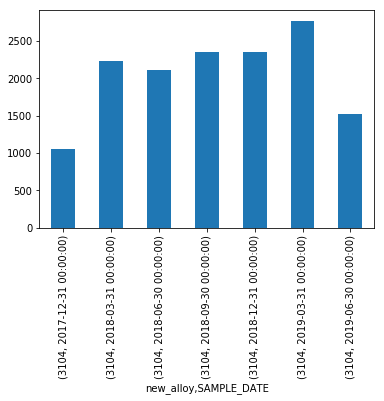

In [289]:
df_3104.groupby("new_alloy").resample("Q",kind="period")["pickup"].count().plot.bar()

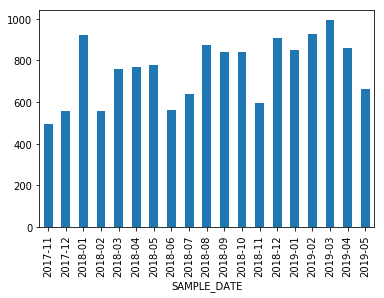

In [295]:
df_3104.resample("M",kind="period")["pickup"].count().plot.bar()